# Data Classification: Crafting BeatWave's Genre Tapestry

## Business Understanding

Classifying songs into different genres can aid in organizing and categorizing a large music library. This can be useful for music streaming platforms that need to categorize and tag their music content effectively. 

We are working for a fictional startup called 'BeatWave', an up-and-coming music streaming platform specializing in electronic music. Through the iterative process of data classification, we can begin to sift through popular electronic songs and give BeatWave a better understanding of which sonic metrics predict which genres. This will allow for a streamlined approach to classifying titles into their appropriate categories.

## Data Understanding

Data source: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

We are using an open source dataset that displays sample data from popular streaming platform Spotify. Using this data will help us gauge our place in competition with the world's leading streaming service.

Let's begin by importing the necessary libraries and superficially inspecting the dataset.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/genres.csv')

df.head()

<ipython-input-1-85ec021d79d1>:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/genres.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [2]:
df.shape

(42305, 22)

In [3]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [4]:
# Assessing the number of genres in our target variable
len(df['genre'].value_counts())

15

In [5]:
df['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrument

## Data Preparation

In [7]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
df = df.dropna(axis=1)

In [9]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [10]:
# Getting the column names containing strings
string_columns = df.select_dtypes(include=['object']).columns

# Printing the column names containing strings
print("Columns containing strings:")
print(string_columns)

Columns containing strings:
Index(['type', 'id', 'uri', 'track_href', 'analysis_url', 'genre'], dtype='object')


## Modeling

### First Model: Decision Tree

In [11]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Split the data into features (X) and target variable (y)
X = df.drop(['genre', 'id', 'type', 'uri', 'track_href', 'analysis_url'], axis=1)  
y = df['genre']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Check the class distribution in y_train
class_distribution = y_train.value_counts()
print(class_distribution)

Underground Rap    4683
Dark Trap          3608
trance             2437
Hiphop             2407
techhouse          2407
trap               2405
dnb                2367
techno             2366
psytrance          2363
hardstyle          2317
RnB                1703
Trap Metal         1572
Rap                1507
Emo                1339
Pop                 363
Name: genre, dtype: int64


In [13]:
# Calculate class weights (inverse proportional to class frequencies)
class_weights = {label: 1.0 / count for label, count in class_distribution.items()}

In [14]:
# Create the DecisionTreeClassifier with class weights
model = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

# Creating the DecisionTreeClassifier with class weights to amplify minority classes
model = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

# Fitting model to training data
model.fit(X_train, y_train)

# Step 4: Evaluate the model's performance on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Initial Model Accuracy:", accuracy)

Initial Model Accuracy: 0.5722727809951542


Not bad! We scored over 50% in initial model accuracy. However, it's possible that accuracy alone may not provide a comprehensive evaluation of the model's performance, especially if the dataset is imbalanced or if different classes have varying importance.

We might want to consider other evaluation metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) to gain a more complete understanding of the model's performance. First, let's check the class distributions to see whether we want to use macro or micro averaging in our performance metrics.

In [15]:
# Creating a DataFrame to analyze the class distribution
class_distribution_df = pd.DataFrame({'genre': y_train})
class_counts = class_distribution_df['genre'].value_counts()

# Calculating class proportions
class_proportions = class_counts / len(y_train)

# Calculating the imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()

# Printing the class counts, proportions, and imbalance ratio
print("Class Counts:")
print(class_counts)

print("\nClass Proportions:")
print(class_proportions)

print("\nImbalance Ratio:")
print(imbalance_ratio)


Class Counts:
Underground Rap    4683
Dark Trap          3608
trance             2437
Hiphop             2407
techhouse          2407
trap               2405
dnb                2367
techno             2366
psytrance          2363
hardstyle          2317
RnB                1703
Trap Metal         1572
Rap                1507
Emo                1339
Pop                 363
Name: genre, dtype: int64

Class Proportions:
Underground Rap    0.138370
Dark Trap          0.106607
trance             0.072007
Hiphop             0.071120
techhouse          0.071120
trap               0.071061
dnb                0.069939
techno             0.069909
psytrance          0.069820
hardstyle          0.068461
RnB                0.050319
Trap Metal         0.046448
Rap                0.044528
Emo                0.039564
Pop                0.010726
Name: genre, dtype: float64

Imbalance Ratio:
12.900826446280991


Class imbalance? Check. The class distribution shows that some genres have much higher sample counts than others. 

**Class Counts:**

The class counts indicate the number of samples available for each genre in our dataset.
Some genres have a substantial number of samples, such as "Underground Rap" (4683 samples) and "Dark Trap" (3608 samples).
On the other hand, genres like "Pop" have very few samples (363 samples), making it a minority class.

**Class Proportions:**

The class proportions represent the percentage of each genre's samples relative to the total number of samples in the dataset.
Genres like "Underground Rap" and "Dark Trap" account for a significant portion of the dataset (around 13.84% and 10.66% respectively).
"Pop" represents a very small proportion of the dataset (around 1.07%).
Imbalance Ratio:

The imbalance ratio is the ratio between the count of samples in the majority class ("Underground Rap") and the count of samples in the minority class ("Pop").
In this case, the imbalance ratio is approximately 12.9, indicating a substantial class imbalance.

Given the high class imbalance in the dataset, ***using macro-averaging for precision, recall, and F1 score calculation is appropriate.*** Macro-averaging will give equal weight to each class, allowing us to evaluate the model's performance across all genres without bias towards the majority classes.

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculating precision
precision = precision_score(y_test, y_pred, average=None)

# Calculating recall
recall = recall_score(y_test, y_pred, average=None)

# Creating a new DataFrame to store the results
result_df = pd.DataFrame({
    'Class': range(len(precision)),
    'Precision': precision,
    'Recall': recall
})

# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Appending the F1 score to the DataFrame
result_df['F1 Score'] = [f1] * len(precision)

# Mapping class indices to genre names and create a new 'Genre' column in the DataFrame
genre_labels = ['Underground Rap', 'Dark Trap', 'Hiphop', 'trance', 'trap', 'techhouse', 'dnb', 'psytrance', 'techno', 'hardstyle', 'RnB', 'Trap Metal', 'Rap', 'Emo', 'Pop']
result_df['Genre'] = [genre_labels[class_idx] for class_idx in result_df['Class']]

# Printing the resultts DataFrame
print(result_df)


    Class  Precision    Recall  F1 Score            Genre
0       0   0.407621  0.363918   0.55516  Underground Rap
1       1   0.526316  0.586510   0.55516        Dark Trap
2       2   0.290850  0.286634   0.55516           Hiphop
3       3   0.134454  0.163265   0.55516           trance
4       4   0.272349  0.384164   0.55516             trap
5       5   0.245742  0.255051   0.55516        techhouse
6       6   0.196881  0.263021   0.55516              dnb
7       7   0.322086  0.264262   0.55516        psytrance
8       8   0.936667  0.938230   0.55516           techno
9       9   0.847039  0.831987   0.55516        hardstyle
10     10   0.911150  0.874582   0.55516              RnB
11     11   0.845745  0.839789   0.55516       Trap Metal
12     12   0.791803  0.818644   0.55516              Rap
13     13   0.777193  0.788256   0.55516              Emo
14     14   0.772174  0.762887   0.55516              Pop


Here's how we interpret the above results dataframe:

**Precision**

- An indication of how many of the predicted positive instances are actually true positive instances.
- Higher precision values indicate that the model has ***fewer false positives for that particular class.***
-  In the case of "trance" (Class 3), the precision is 0.118421. This means that, out of all the instances the model predicted as "trance," only around 11.84% of them are **correct**, while the rest are false positives.

**Recall**

- Sensitivity or true positive rate; measures how many of the actual positive instances the model correctly identified
- Higher recall values indicate that the model has ***fewer false negatives for that particular class.***
- The recall for "Dark Trap" (Class 1) is approximately 0.563050. This means that the model correctly identified around 56.31% of all instances of "Dark Trap," while some were **missed** as false negatives.

**F1 Score**

- Harmonic mean of precision and recall
- Provides a balanced measure of the model's performance, taking both false positives and false negatives into account.
- Usually used when there is an ***imbalance between the number of samples in different classes.***
- In our case, a score of 0.556652 indicates that the model achieves a moderate balance between precision and recall when considering all genres together; our model's ability to correctly identify both positive and negative instances (precision and recall) for each genre is ***moderate but not excellent.***

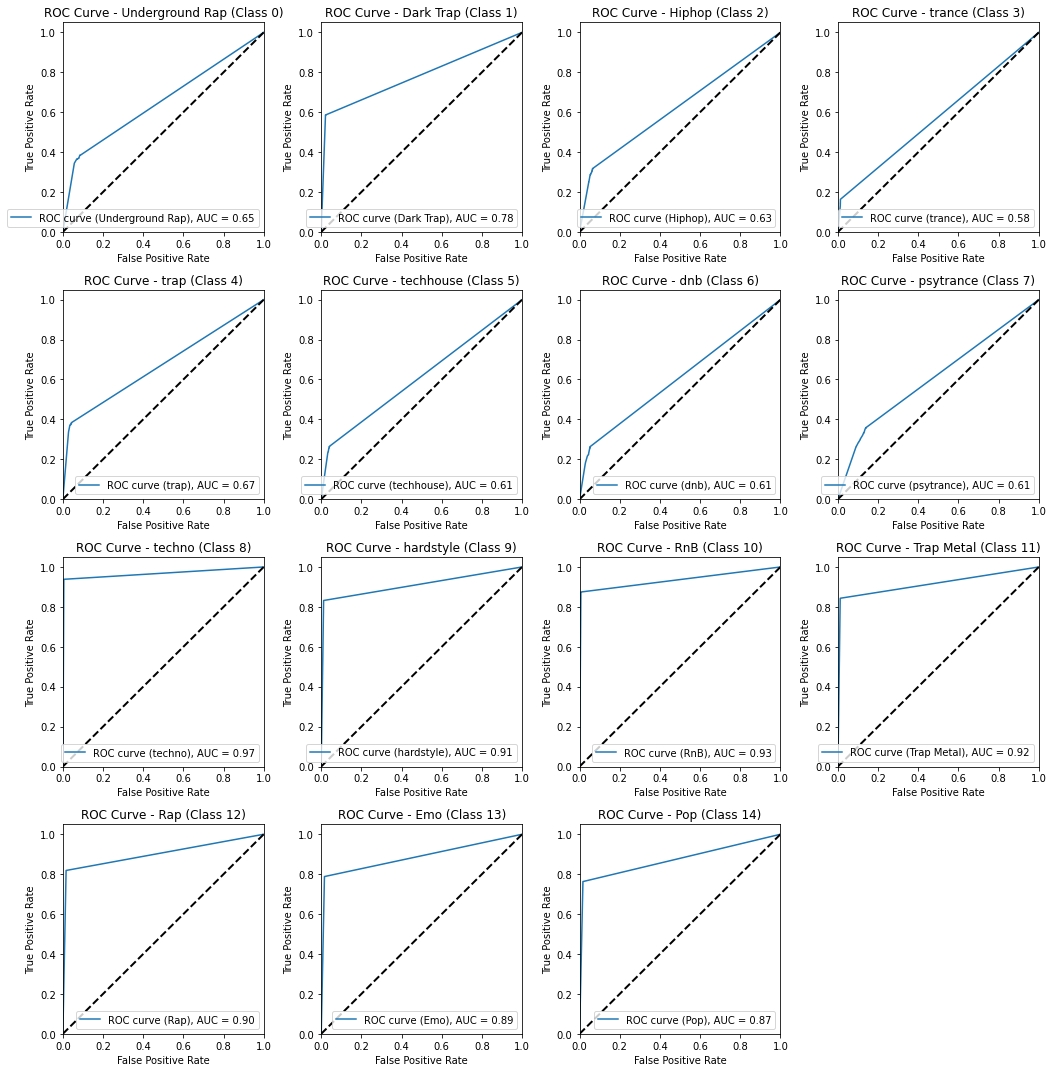

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Getting the predicted probabilities for each class
y_score = model.predict_proba(X_test)

# Binarizing the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculating the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(np.unique(y))
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class in separate subplots
plt.figure(figsize=(15, 15))
for i in range(num_classes):
    genre = result_df.loc[result_df['Class'] == i, 'Genre'].values[0]
    plt.subplot(4, 4, i+1)
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({genre}), AUC = {roc_auc[i]:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {genre} (Class {i})')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [18]:
# Defining new 'genres' object 
genres = df['genre'].unique() 

# Creating a new DataFrame to store the AUC values for each class
auc_df = pd.DataFrame({
    'Genre': genres,
    'AUC': [roc_auc[i] for i in range(len(genres))]
})

# Sorting the DataFrame in ascending order based on the AUC values
auc_df_sorted = auc_df.sort_values(by='AUC', ascending=True)

print(auc_df_sorted)


              Genre       AUC
3               Emo  0.575335
6               Pop  0.606359
7            Hiphop  0.611636
5               RnB  0.612450
2        Trap Metal  0.627235
0         Dark Trap  0.652706
4               Rap  0.672341
1   Underground Rap  0.782301
14        hardstyle  0.873130
13              dnb  0.886009
12             trap  0.901276
9            techno  0.910064
11        psytrance  0.916015
10           trance  0.934043
8         techhouse  0.966686


ROC- AUC Results interpretation:

- The class **'Emo'** has the lowest AUC value of 0.546, indicating that the model's performance in distinguishing 'Emo' songs from non-'Emo' songs is relatively lower compared to other genres.

- The class **'Pop'** has an AUC value of 0.605, which is higher than 'Emo' but still relatively low compared to other genres.

- As the AUC values increase, the model's ability to distinguish between the positive class (the specific genre) and the negative class (other genres) improves.

- The class **'techhouse'** has the highest AUC value of 0.972, indicating that the model performs exceptionally well in distinguishing 'techhouse' songs from non-'techhouse' songs.

### Model 2: Decision Tree (Tuned Hyperparameters)

Hyperparameter tuning is a crucial step in machine learning model development as it helps find the best combination of hyperparameters that can lead to improved model performance. Let's embark on the grid search process to explore different combinations of hyperparameters and identify the ones that result in higher accuracy, leading to an improvement in the model's overall performance.

By tuning hyperparameters, we are fine-tuning the decision tree model, making it more effective in capturing the underlying patterns and relationships in the data, thereby improving its predictive capabilities on unseen data.

In [19]:
from sklearn.model_selection import GridSearchCV


# Reducing hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 15],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],   
    'criterion': ['gini', 'entropy']
}

# Performing grid search
model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [20]:
# Finding the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Creating a new Decision Tree model with the best hyperparameters
best_model = DecisionTreeClassifier(random_state=42, **best_params)

# Fitting the model to the training data and evaluate on the test data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Accuracy: 0.6352676988535634
Classification Report:
                 precision    recall  f1-score   support

      Dark Trap       0.52      0.36      0.43       970
            Emo       0.54      0.61      0.57       341
         Hiphop       0.44      0.43      0.44       621
            Pop       0.39      0.07      0.12        98
            Rap       0.88      0.28      0.42       341
            RnB       0.27      0.30      0.29       396
     Trap Metal       0.41      0.24      0.30       384
Underground Rap       0.42      0.64      0.51      1192
            dnb       0.95      0.95      0.95       599
      hardstyle       0.84      0.84      0.84       619
      psytrance       0.90      0.86      0.88       598
      techhouse       0.85      0.85      0.85       568
         techno       0.80      0.81      0.81       590
         trance       0.

It appears that performing hyperparameter tuning has improved the accuracy of our Decision Tree model. Initially, the accuracy of the Decision Tree model was **0.5765,** but after applying the hyperparameter tuning using Grid Search with Cross-Validation, the accuracy increased to **0.6353.** This indicates that the tuned model is performing better on test data compared to the initial model.

### Third Model: Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6696607965961471
                 precision    recall  f1-score   support

      Dark Trap       0.54      0.45      0.49       970
            Emo       0.72      0.74      0.73       341
         Hiphop       0.42      0.39      0.41       621
            Pop       0.25      0.08      0.12        98
            Rap       0.48      0.32      0.39       341
            RnB       0.41      0.36      0.38       396
     Trap Metal       0.36      0.27      0.31       384
Underground Rap       0.39      0.53      0.45      1192
            dnb       0.96      0.98      0.97       599
      hardstyle       0.89      0.93      0.91       619
      psytrance       0.94      0.93      0.93       598
      techhouse       0.87      0.90      0.88       568
         techno       0.87      0.85      0.86       590
         trance       0.82      0.90      0.86       562
           trap       0.86      0.86      0.86       582

       accuracy                           0

### Fourth model: K-nearest neighbors

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [23]:
# Finding sqrt of number of data points to get accurate k value
n = df.shape[0]
sqrt_n = int(n ** 0.5)  # Calculate the square root of 'n'

print("Number of data points:", n)
print("Square root of 'n':", sqrt_n)

Number of data points: 42305
Square root of 'n': 205


In [24]:
k = 250 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("k-NN Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

k-NN Accuracy: 0.26604420281290625
Classification Report:
                 precision    recall  f1-score   support

      Dark Trap       0.16      0.06      0.09       970
            Emo       0.08      0.01      0.01       341
         Hiphop       0.10      0.04      0.06       621
            Pop       0.00      0.00      0.00        98
            Rap       0.00      0.00      0.00       341
            RnB       0.03      0.00      0.00       396
     Trap Metal       0.00      0.00      0.00       384
Underground Rap       0.28      0.70      0.40      1192
            dnb       0.25      0.65      0.36       599
      hardstyle       0.16      0.09      0.11       619
      psytrance       0.58      0.65      0.61       598
      techhouse       0.23      0.04      0.07       568
         techno       0.35      0.48      0.41       590
         trance       0.09      0.02      0.04       562
           trap       0.14      0.30      0.19       582

       accuracy             

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the classification report and accuracy score, the k-Nearest Neighbors (k-NN) model is not performing well on our dataset. The overall accuracy is quite low at around 0.27, which means the model is not making accurate predictions on the majority of the data points.

The classification report also shows low precision, recall, and F1-score for most classes. For example, the F1-scores for many classes are close to 0, indicating that the model is struggling to correctly classify instances for those classes. The macro-avg F1-score of around 0.16 is also quite low, which suggests that the model is not performing well across all classes on average.

Possible reasons for the poor performance of the k-NN model:

- Curse of Dimensionality: k-NN can perform poorly when the number of features (dimensions) is high relative to the number of data points. The curse of dimensionality can lead to sparsity in the feature space, making it difficult for k-NN to find meaningful neighbors.

- Imbalanced Classes: The class distribution in the dataset may be imbalanced, and some classes may have very few instances. This imbalance can negatively impact the k-NN model's ability to learn and generalize.

- Feature Scaling: k-NN is sensitive to the scale of features, and if features are not properly scaled, it can lead to biased results.

To improve the performance of the k-NN model:

- Feature Scaling: Make sure to scale features to a similar range. Standardization (z-score normalization) or Min-Max scaling are common techniques for feature scaling

- Hyperparameter Tuning: Experiment with different values of 'k' to find the optimal value that yields the best performance on dataset. Could try a range of 'k' values and use cross-validation to evaluate the model's performance

- Class Balancing: If the class distribution is imbalanced, use techniques like oversampling, undersampling, or class weighting to balance the classes

- Dimensionality Reduction: If many features, use dimensionality reduction techniques like PCA to reduce the number of dimensions and remove noise

In [26]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Create the k-nearest neighbors model with k=5
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled features
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Calculate accuracy score on the test set (scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy (Scaled):", accuracy_scaled)


Accuracy (Scaled): 0.5647086632785723
